# Bar Chart Preprocessing & Analysis

Notebook này giúp:
- Xử lý nhiều ảnh bar chart cùng lúc
- Hiển thị kết quả preprocessing
- Giải thích chi tiết các chỉ số/thông số

In [7]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# Add project root to path (chạy được từ bleh/ hoặc notebooks/)
_cwd = Path().resolve()
project_root = _cwd if (_cwd / "src").is_dir() else _cwd.parent
sys.path.insert(0, str(project_root))

from src.preprocessing.image_utils import ImagePreprocessor

NUM_IMAGES = 5  # -1 để lấy hết ảnh

bar_charts_dir = project_root / "data" / "raw" / "bar_charts"

# Danh sách ảnh
all_images = sorted(bar_charts_dir.glob("chart_*.png"))
if NUM_IMAGES > 0:
    image_paths = all_images[:NUM_IMAGES]
else:
    image_paths = all_images

print(f"Tìm thấy {len(all_images)} ảnh trong thư mục")
print(f"Sẽ xử lý {len(image_paths)} ảnh")
print(f"\nDanh sách ảnh sẽ xử lý:")
for i, path in enumerate(image_paths, 1):
    print(f"  {i}. {path.name}")

pre = ImagePreprocessor()

Tìm thấy 500 ảnh trong thư mục
Sẽ xử lý 5 ảnh

Danh sách ảnh sẽ xử lý:
  1. chart_0001.png
  2. chart_0002.png
  3. chart_0003.png
  4. chart_0004.png
  5. chart_0005.png


In [8]:
# Lưu kết quả
results = []

for idx, image_path in enumerate(image_paths, 1):
    print(f"\n[{idx}/{len(image_paths)}] Đang xử lý: {image_path.name}")
    
    try:
        # Load và preprocess
        original_img = pre.load_image(str(image_path))
        processed_img = pre.preprocess_pipeline(str(image_path))
        edges = pre.detect_edges(processed_img)
        
        # Lưu kết quả
        results.append({
            'name': image_path.name,
            'path': image_path,
            'original': original_img,
            'processed': processed_img,
            'edges': edges
        })
        
        print(f"  Thành công - Shape: {processed_img.shape}, Edges: {np.sum(edges > 0)} pixels")
        
    except Exception as e:
        print(f"  Lỗi: {e}")
        continue

print(f"Đã xử lý {len(results)}/{len(image_paths)} ảnh thành công")


[1/5] Đang xử lý: chart_0001.png
  Thành công - Shape: (480, 720, 3), Edges: 10564 pixels

[2/5] Đang xử lý: chart_0002.png
  Thành công - Shape: (480, 720, 3), Edges: 10901 pixels

[3/5] Đang xử lý: chart_0003.png
  Thành công - Shape: (480, 720, 3), Edges: 11225 pixels

[4/5] Đang xử lý: chart_0004.png
  Thành công - Shape: (480, 720, 3), Edges: 11603 pixels

[5/5] Đang xử lý: chart_0005.png
  Thành công - Shape: (480, 720, 3), Edges: 10527 pixels
Đã xử lý 5/5 ảnh thành công


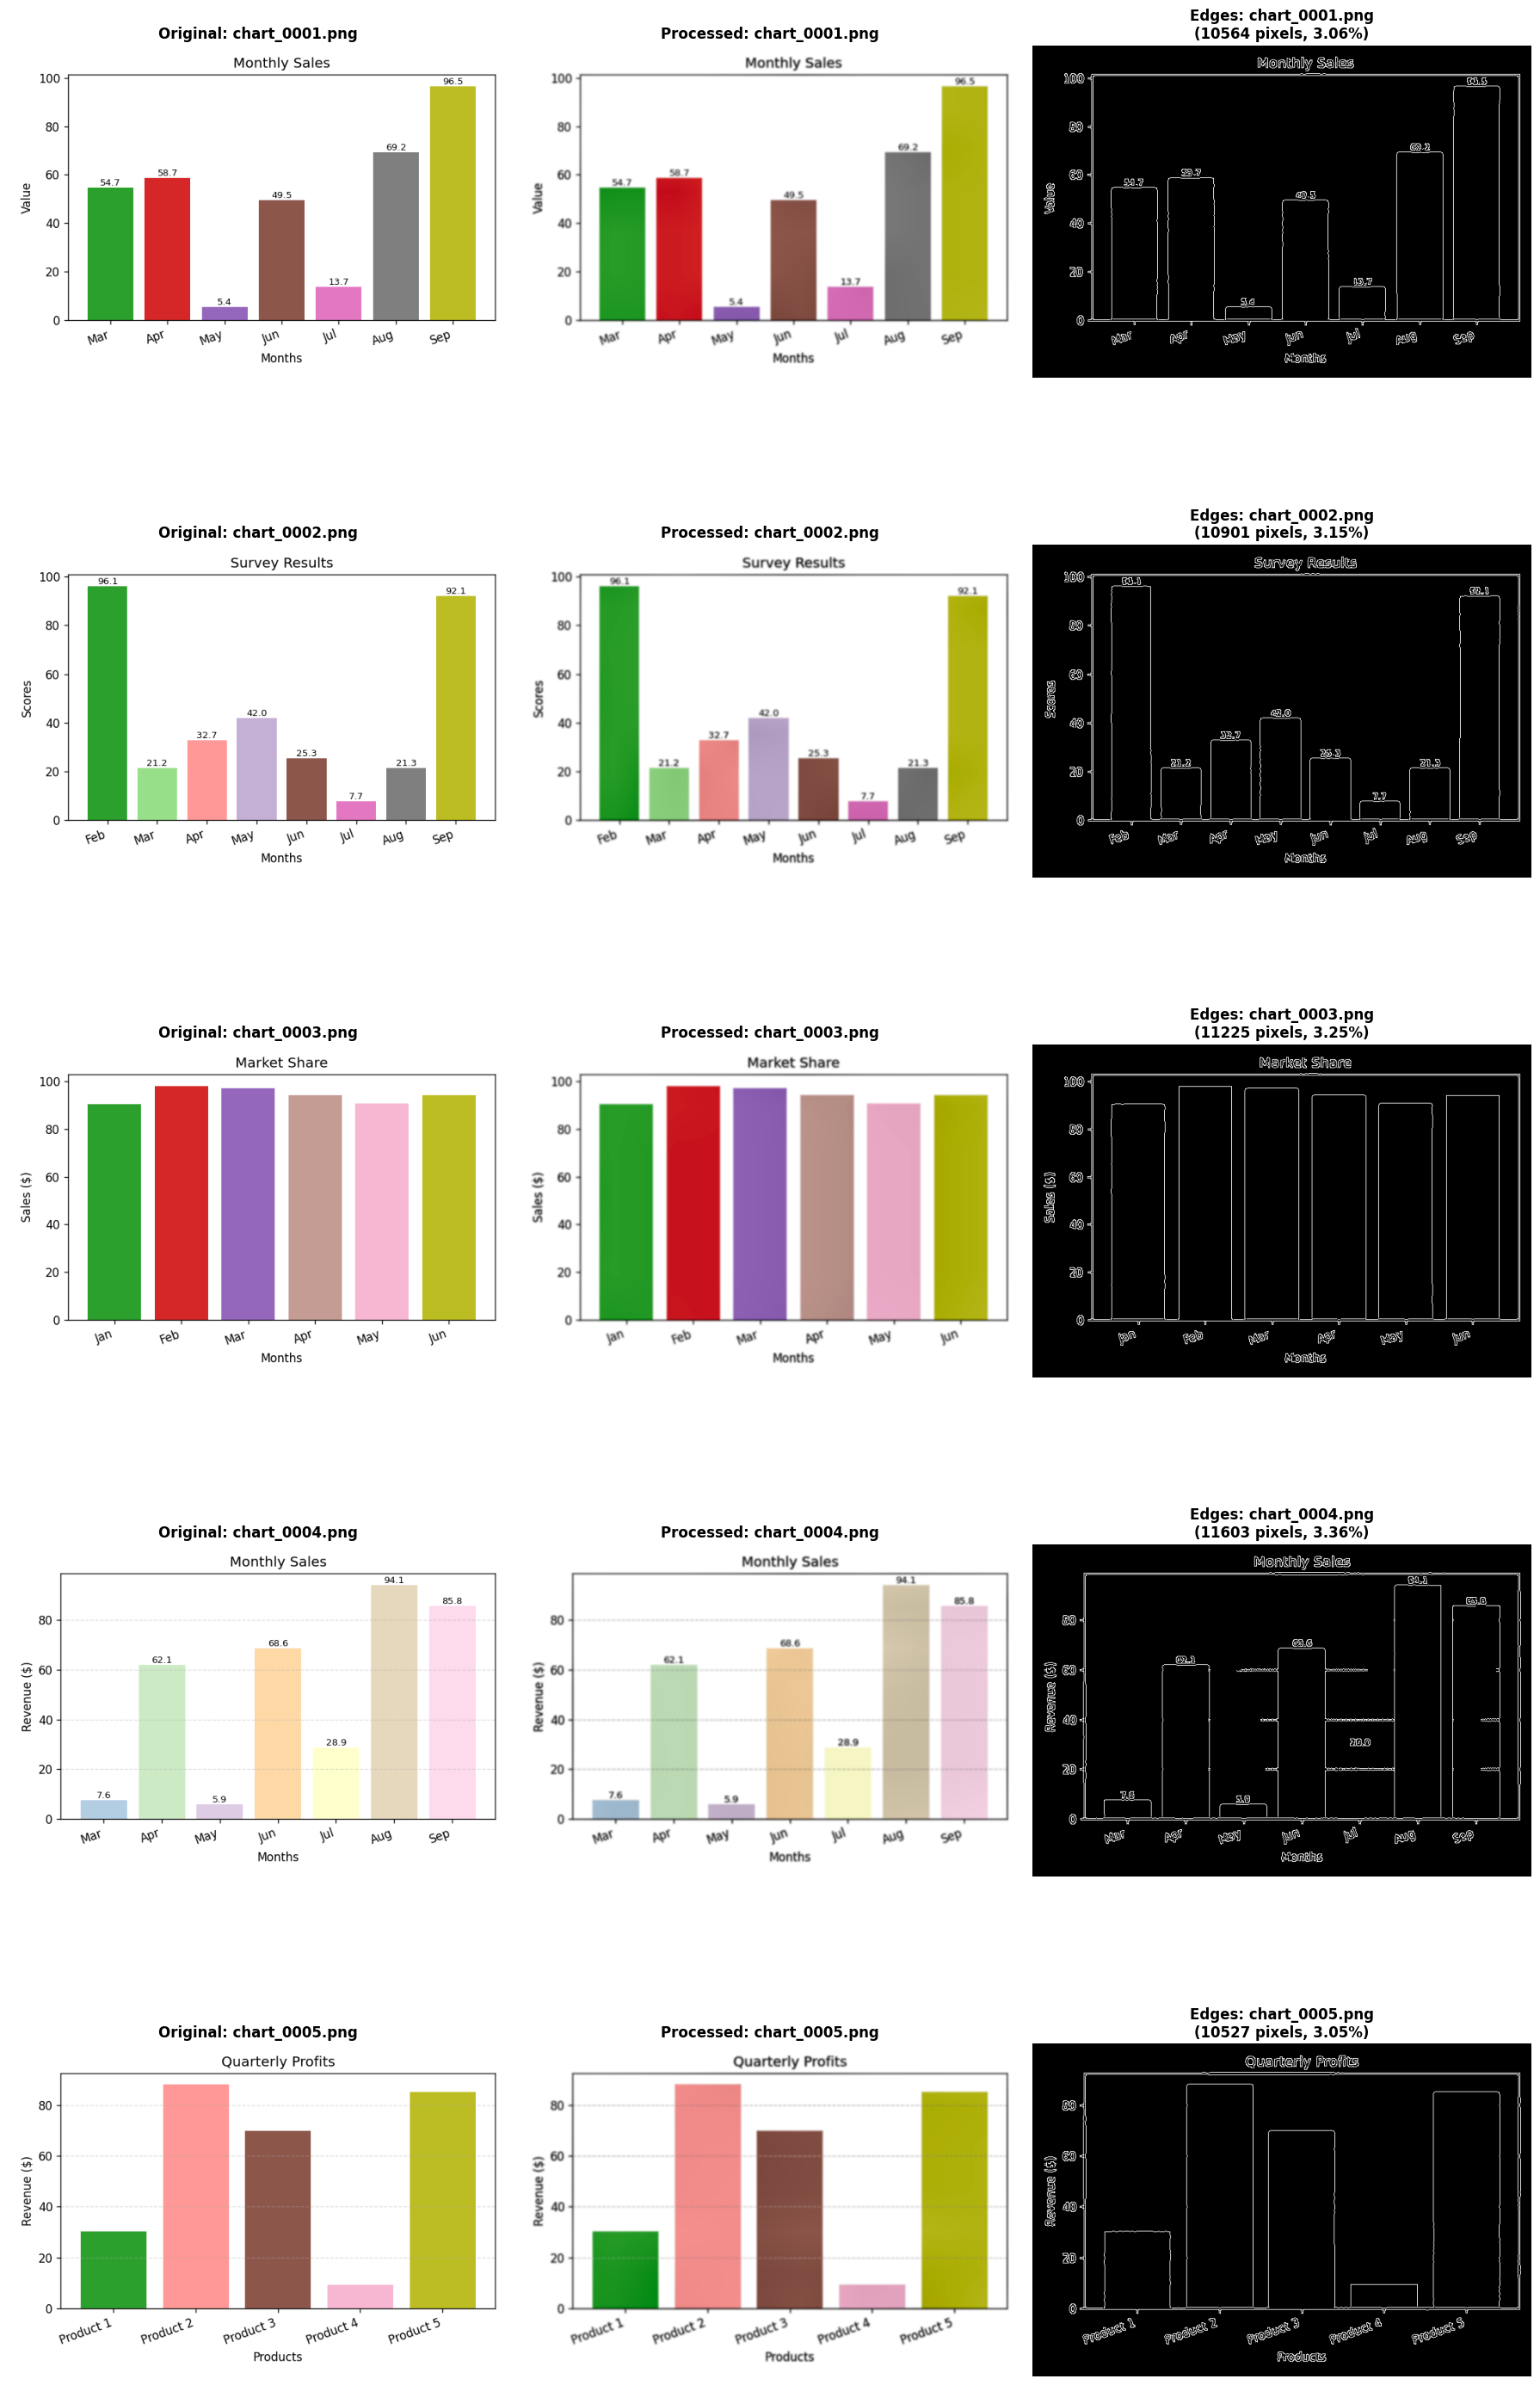

In [9]:
# Hiển thị kết quả dạng grid
if not results:
    print("Không có kết quả")
else:
    num_images = len(results)
    cols = 3  # Số cột: Original, Processed, Edges
    rows = num_images
    
    fig, axes = plt.subplots(rows, cols, figsize=(18, 6 * rows))
    
    # Nếu chỉ có 1 ảnh, axes sẽ là 1D array, cần reshape
    if num_images == 1:
        axes = axes.reshape(1, -1)
    
    for row_idx, result in enumerate(results):
        # Ảnh gốc
        axes[row_idx, 0].imshow(result['original'])
        axes[row_idx, 0].set_title(f"Original: {result['name']}", fontsize=12, fontweight='bold')
        axes[row_idx, 0].axis('off')
        
        # Ảnh đã xử lý
        axes[row_idx, 1].imshow(result['processed'])
        axes[row_idx, 1].set_title(f"Processed: {result['name']}", fontsize=12, fontweight='bold')
        axes[row_idx, 1].axis('off')
        
        # Edges
        axes[row_idx, 2].imshow(result['edges'], cmap='gray')
        edge_count = np.sum(result['edges'] > 0)
        edge_pct = 100 * edge_count / result['edges'].size
        axes[row_idx, 2].set_title(
            f"Edges: {result['name']}\n({edge_count} pixels, {edge_pct:.2f}%)", 
            fontsize=12, 
            fontweight='bold'
        )
        axes[row_idx, 2].axis('off')
    
    plt.tight_layout()
    plt.show()

In [10]:
# Thống kê - Optional
if results:
    print("THỐNG KÊ TỔNG HỢP")
    
    for result in results:
        edges = result['edges']
        edge_count = np.sum(edges > 0)
        edge_pct = 100 * edge_count / edges.size
        
        print(f"\n{result['name']}:")
        print(f"  - Shape: {result['processed'].shape}")
        print(f"  - Edge pixels: {edge_count:,} ({edge_pct:.2f}%)")
        print(f"  - Min/Max values: {result['processed'].min()}/{result['processed'].max()}")
        print(f"  - Mean brightness: {result['processed'].mean():.2f}")

THỐNG KÊ TỔNG HỢP

chart_0001.png:
  - Shape: (480, 720, 3)
  - Edge pixels: 10,564 (3.06%)
  - Min/Max values: 2/255
  - Mean brightness: 215.35

chart_0002.png:
  - Shape: (480, 720, 3)
  - Edge pixels: 10,901 (3.15%)
  - Min/Max values: 0/255
  - Mean brightness: 223.35

chart_0003.png:
  - Shape: (480, 720, 3)
  - Edge pixels: 11,225 (3.25%)
  - Min/Max values: 0/255
  - Mean brightness: 195.21

chart_0004.png:
  - Shape: (480, 720, 3)
  - Edge pixels: 11,603 (3.36%)
  - Min/Max values: 39/255
  - Mean brightness: 235.88

chart_0005.png:
  - Shape: (480, 720, 3)
  - Edge pixels: 10,527 (3.05%)
  - Min/Max values: 0/255
  - Mean brightness: 212.72


## Giải thích chi tiết các chỉ số/thông số

In [11]:
# ============================================================
# GIẢI THÍCH CÁC CHỈ SỐ/THÔNG SỐ TRONG XỬ LÝ ẢNH
# ============================================================

if results:
    sample = results[0]
    img = sample['processed']
    edges = sample['edges']
    original = sample['original']
    
    print("=" * 70)
    print("GIẢI THÍCH CHI TIẾT CÁC CHỈ SỐ")
    print("=" * 70)
    
    # ========== 1. SHAPE (Kích thước ảnh) ==========
    print("\n1. SHAPE (Kích thước ảnh)")
    print("-" * 70)
    print(f"   Shape: {img.shape}")
    print(f"   → Đây là tuple (Height, Width, Channels)")
    print(f"   → Height (Chiều cao): {img.shape[0]} pixels")
    print(f"   → Width (Chiều rộng):  {img.shape[1]} pixels")
    print(f"   → Channels (Kênh màu): {img.shape[2]} kênh (RGB: Red, Green, Blue)")
    print(f"\n   📊 Ví dụ: Shape (480, 720, 3) nghĩa là:")
    print(f"      • Ảnh cao 480 pixels, rộng 720 pixels")
    print(f"      • Có 3 kênh màu (RGB)")
    print(f"      • Tổng số pixel = {img.shape[0]} × {img.shape[1]} = {img.shape[0] * img.shape[1]:,} pixels")
    print(f"      • Tổng số giá trị = {img.shape[0]} × {img.shape[1]} × {img.shape[2]} = {img.size:,} giá trị")
    
    # ========== 2. DTYPE (Kiểu dữ liệu) ==========
    print("\n2. DTYPE (Kiểu dữ liệu)")
    print("-" * 70)
    print(f"   Dtype: {img.dtype}")
    print(f"   → uint8 = Unsigned Integer 8-bit")
    print(f"   → Mỗi giá trị pixel là số nguyên từ 0 đến 255")
    print(f"   → 0 = màu tối nhất (đen)")
    print(f"   → 255 = màu sáng nhất (trắng)")
    print(f"   → Với RGB: mỗi kênh (R, G, B) có giá trị 0-255")
    print(f"\n   📊 Ví dụ pixel màu:")
    print(f"      • R=255, G=0, B=0 → Màu đỏ thuần")
    print(f"      • R=128, G=128, B=128 → Màu xám")
    print(f"      • R=0, G=0, B=0 → Màu đen")
    
    # ========== 3. MIN/MAX VALUES ==========
    print("\n3. MIN/MAX VALUES (Giá trị nhỏ nhất/lớn nhất)")
    print("-" * 70)
    print(f"   Min value: {img.min()}")
    print(f"   Max value: {img.max()}")
    print(f"   → Min: Pixel tối nhất trong ảnh có giá trị {img.min()}")
    print(f"   → Max: Pixel sáng nhất trong ảnh có giá trị {img.max()}")
    print(f"   → Nếu min=0 và max=255: ảnh sử dụng đầy đủ dải màu")
    print(f"   → Nếu min > 0: ảnh không có vùng đen hoàn toàn")
    print(f"   → Nếu max < 255: ảnh không có vùng trắng hoàn toàn")
    
    # Tính mean (trung bình) để hiểu độ sáng tổng thể
    mean_value = img.mean()
    print(f"   → Mean (trung bình): {mean_value:.2f}")
    print(f"     • Mean < 85: Ảnh tối")
    print(f"     • 85 ≤ Mean ≤ 170: Ảnh vừa")
    print(f"     • Mean > 170: Ảnh sáng")
    
    # ========== 4. EDGE PIXELS ==========
    print("\n4. EDGE PIXELS (Số pixel biên)")
    print("-" * 70)
    edge_count = np.sum(edges > 0)
    total_pixels = edges.size
    edge_percentage = 100 * edge_count / total_pixels
    
    print(f"   Edge pixels: {edge_count:,} / {total_pixels:,} ({edge_percentage:.2f}%)")
    print(f"   → Edge detection (Canny) tìm các đường viền trong ảnh")
    print(f"   → Pixel có giá trị > 0 = là edge (biên)")
    print(f"   → Pixel có giá trị = 0 = không phải edge")
    print(f"\n   📊 Ý nghĩa:")
    print(f"      • Edge pixels cao → Ảnh có nhiều chi tiết, đường viền phức tạp")
    print(f"      • Edge pixels thấp → Ảnh đơn giản, ít chi tiết")
    print(f"      • Với biểu đồ: Edge pixels thường chiếm 2-5% tổng số pixel")
    print(f"      • Edge detection giúp:")
    print(f"        ✓ Tìm đường viền của các cột trong bar chart")
    print(f"        ✓ Tìm đường grid, trục tọa độ")
    print(f"        ✓ Tách biệt text và hình vẽ")
    
    # Phân tích phân bố edge
    edge_density = edge_count / total_pixels
    print(f"\n   📈 Phân tích:")
    print(f"      • Edge density: {edge_density:.4f}")
    if edge_percentage < 1:
        print(f"      • Đánh giá: Rất ít edge → Ảnh đơn giản hoặc blur quá nhiều")
    elif edge_percentage < 3:
        print(f"      • Đánh giá: Edge vừa phải → Phù hợp cho biểu đồ")
    elif edge_percentage < 5:
        print(f"      • Đánh giá: Nhiều edge → Ảnh chi tiết, có thể có noise")
    else:
        print(f"      • Đánh giá: Rất nhiều edge → Ảnh rất chi tiết hoặc nhiều noise")
    
    # ========== 5. SO SÁNH ORIGINAL vs PROCESSED ==========
    print("\n5. SO SÁNH ORIGINAL vs PROCESSED")
    print("-" * 70)
    
    print(f"   Original image:")
    print(f"      • Shape: {original.shape}")
    print(f"      • Min/Max: {original.min()}/{original.max()}")
    print(f"      • Mean: {original.mean():.2f}")
    print(f"      • Std (độ tương phản): {original.std():.2f}")
    
    print(f"\n   Processed image (sau blur + CLAHE):")
    print(f"      • Shape: {img.shape}")
    print(f"      • Min/Max: {img.min()}/{img.max()}")
    print(f"      • Mean: {img.mean():.2f}")
    print(f"      • Std (độ tương phản): {img.std():.2f}")
    
    contrast_improvement = img.std() - original.std()
    print(f"\n   📊 Cải thiện:")
    print(f"      • Standard deviation (độ tương phản):")
    print(f"        - Original: {original.std():.2f}")
    print(f"        - Processed: {img.std():.2f}")
    print(f"        - Cải thiện: {contrast_improvement:+.2f}")
    print(f"      • CLAHE (Contrast Limited Adaptive Histogram Equalization)")
    print(f"        → Tăng độ tương phản cục bộ")
    print(f"        → Làm nổi bật chi tiết trong ảnh")
    print(f"        → Giúp edge detection tốt hơn")
    
    print("\n" + "=" * 70)
    print("KẾT LUẬN:")
    print("=" * 70)
    print("""
    Các chỉ số này giúp bạn:
    
    1. SHAPE → Biết kích thước ảnh, tính toán bộ nhớ cần thiết
    2. MIN/MAX → Đánh giá độ tương phản, phạm vi màu sắc
    3. MEAN → Đánh giá độ sáng tổng thể của ảnh
    4. EDGE PIXELS → Đánh giá độ phức tạp, số lượng chi tiết
    5. STANDARD DEVIATION → Đo độ tương phản (cao = tương phản tốt)
    
    Khi xử lý biểu đồ:
    • Edge pixels 2-5% là lý tưởng cho bar chart
    • Processed image nên có std cao hơn original (tương phản tốt hơn)
    • Shape giúp tính toán crop/resize phù hợp
    """)
    print("=" * 70)

GIẢI THÍCH CHI TIẾT CÁC CHỈ SỐ

1. SHAPE (Kích thước ảnh)
----------------------------------------------------------------------
   Shape: (480, 720, 3)
   → Đây là tuple (Height, Width, Channels)
   → Height (Chiều cao): 480 pixels
   → Width (Chiều rộng):  720 pixels
   → Channels (Kênh màu): 3 kênh (RGB: Red, Green, Blue)

   📊 Ví dụ: Shape (480, 720, 3) nghĩa là:
      • Ảnh cao 480 pixels, rộng 720 pixels
      • Có 3 kênh màu (RGB)
      • Tổng số pixel = 480 × 720 = 345,600 pixels
      • Tổng số giá trị = 480 × 720 × 3 = 1,036,800 giá trị

2. DTYPE (Kiểu dữ liệu)
----------------------------------------------------------------------
   Dtype: uint8
   → uint8 = Unsigned Integer 8-bit
   → Mỗi giá trị pixel là số nguyên từ 0 đến 255
   → 0 = màu tối nhất (đen)
   → 255 = màu sáng nhất (trắng)
   → Với RGB: mỗi kênh (R, G, B) có giá trị 0-255

   📊 Ví dụ pixel màu:
      • R=255, G=0, B=0 → Màu đỏ thuần
      • R=128, G=128, B=128 → Màu xám
      • R=0, G=0, B=0 → Màu đen

3. MIN

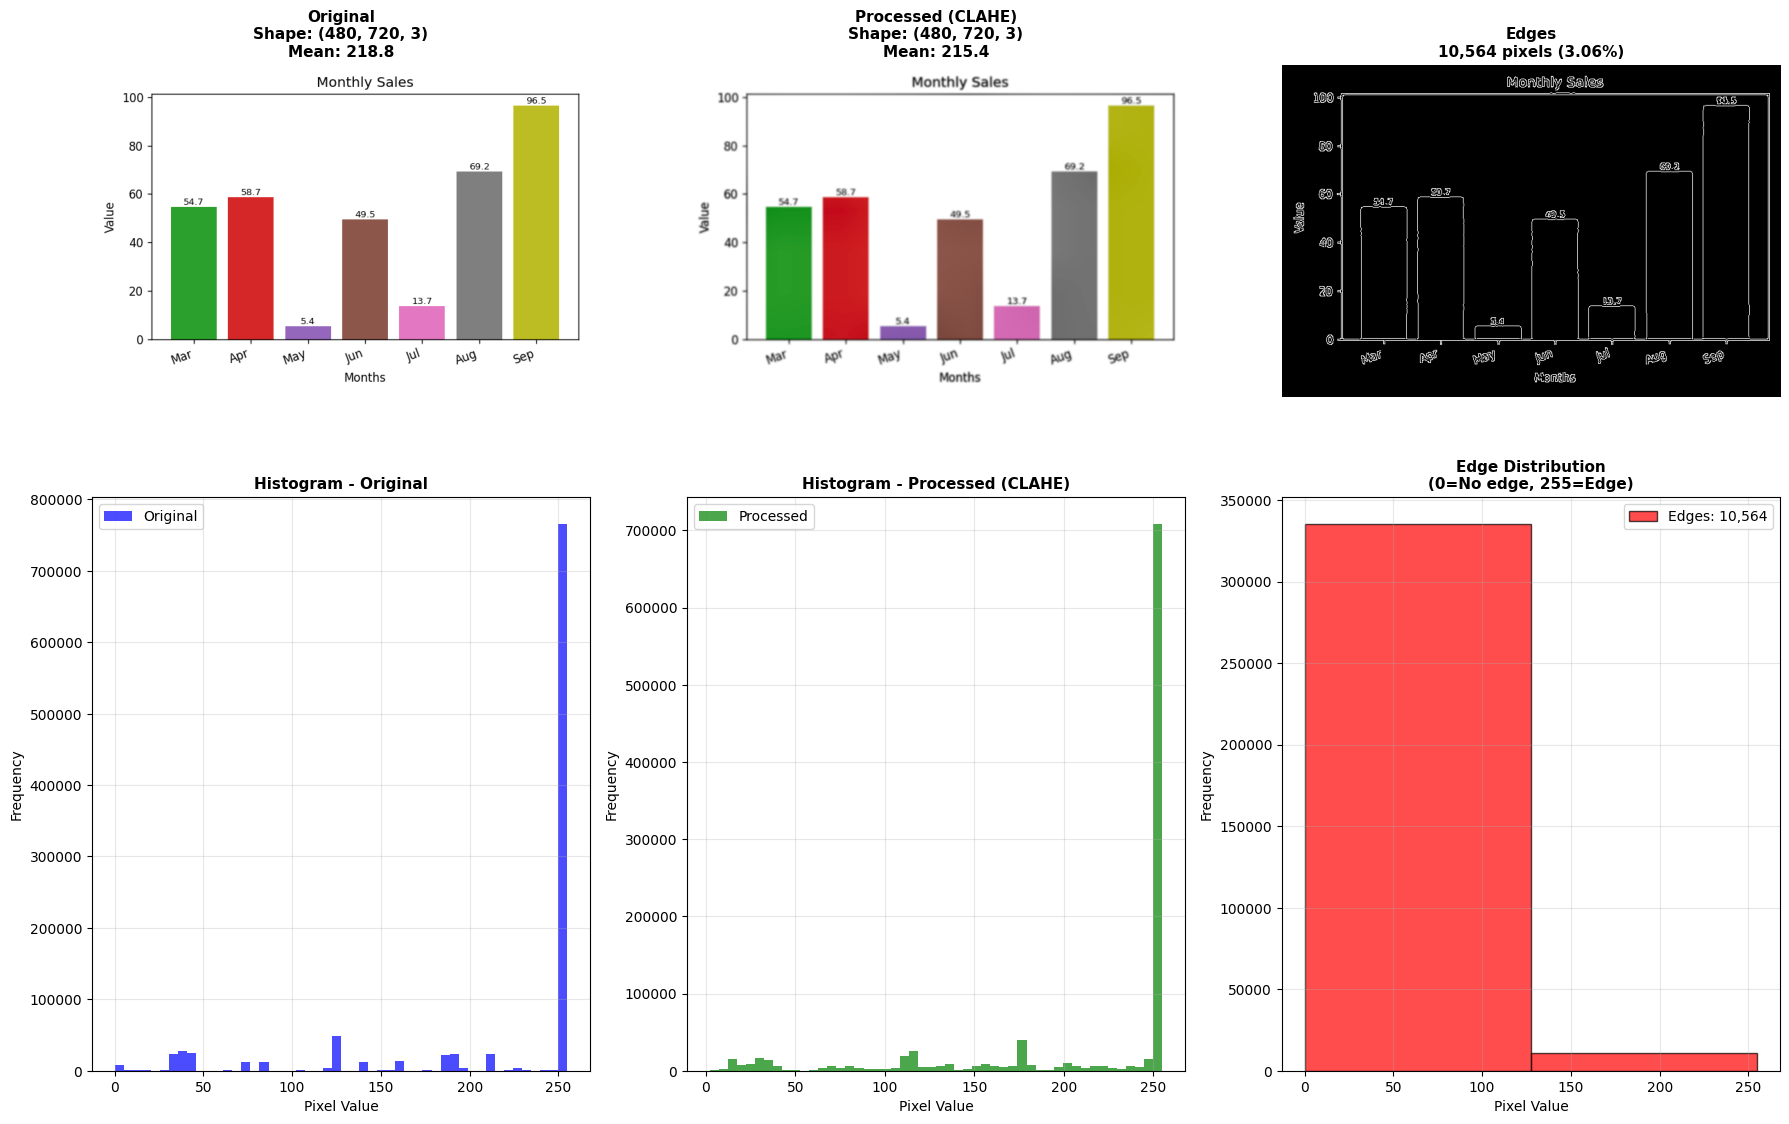


📊 Giải thích visualization:
   • Hàng trên: So sánh ảnh gốc, đã xử lý và edges
   • Hàng dưới: Histogram cho thấy phân bố giá trị pixel
     - Histogram rộng = độ tương phản tốt
     - Histogram hẹp = ảnh có độ tương phản thấp


In [12]:
# MINH HỌA TRỰC QUAN - Visualization chi tiết
if results:
    sample = results[0]
    original = sample['original']
    processed = sample['processed']
    edges = sample['edges']
    
    edge_count = np.sum(edges > 0)
    edge_percentage = 100 * edge_count / edges.size
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Hàng 1: Original, Processed, Edges
    axes[0, 0].imshow(original)
    axes[0, 0].set_title(f"Original\nShape: {original.shape}\nMean: {original.mean():.1f}", 
                         fontsize=11, fontweight='bold')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(processed)
    axes[0, 1].set_title(f"Processed (CLAHE)\nShape: {processed.shape}\nMean: {processed.mean():.1f}", 
                         fontsize=11, fontweight='bold')
    axes[0, 1].axis('off')
    
    axes[0, 2].imshow(edges, cmap='gray')
    axes[0, 2].set_title(f"Edges\n{edge_count:,} pixels ({edge_percentage:.2f}%)", 
                         fontsize=11, fontweight='bold')
    axes[0, 2].axis('off')
    
    # Hàng 2: Histogram so sánh
    axes[1, 0].hist(original.flatten(), bins=50, alpha=0.7, color='blue', label='Original')
    axes[1, 0].set_title("Histogram - Original", fontsize=11, fontweight='bold')
    axes[1, 0].set_xlabel("Pixel Value")
    axes[1, 0].set_ylabel("Frequency")
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    axes[1, 1].hist(processed.flatten(), bins=50, alpha=0.7, color='green', label='Processed')
    axes[1, 1].set_title("Histogram - Processed (CLAHE)", fontsize=11, fontweight='bold')
    axes[1, 1].set_xlabel("Pixel Value")
    axes[1, 1].set_ylabel("Frequency")
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    # Edge distribution
    edge_values = edges.flatten()
    axes[1, 2].hist(edge_values, bins=2, alpha=0.7, color='red', 
                    label=f'Edges: {edge_count:,}', edgecolor='black')
    axes[1, 2].set_title(f"Edge Distribution\n(0=No edge, 255=Edge)", 
                         fontsize=11, fontweight='bold')
    axes[1, 2].set_xlabel("Pixel Value")
    axes[1, 2].set_ylabel("Frequency")
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Giải thích visualization:")
    print("   • Hàng trên: So sánh ảnh gốc, đã xử lý và edges")
    print("   • Hàng dưới: Histogram cho thấy phân bố giá trị pixel")
    print("     - Histogram rộng = độ tương phản tốt")
    print("     - Histogram hẹp = ảnh có độ tương phản thấp")